# OpenCV Basic Tutorial

## 1. Install OpenCV

First, let's start by installing the OpenCV library. You can install it using pip.

```bash

pip install opencv-python

In [2]:
import cv2

## 2. Read an Image

We use the `cv2.imread('path_to_image', flag)` function to read an image.

By default, OpenCV reads images in color (BGR format). This is achieved by using the `cv2.IMREAD_COLOR` flag or simply omitting the flag.

To read an image in grayscale, use the `cv2.IMREAD_GRAYSCALE` flag.

If you want to load an image as is, including any alpha channel (transparency) or other image details, use the cv2.IMREAD_UNCHANGED flag.

### Summary of Image Reading Flags

- **`cv2.IMREAD_COLOR`**: Loads the image in color (BGR format).

- **`cv2.IMREAD_GRAYSCALE`**: Loads the image in grayscale.

- **`cv2.IMREAD_UNCHANGED`**: Loads the image as is, preserving all channels and image data.


In [3]:
image = cv2.imread('images/cat.jpg', cv2.IMREAD_COLOR)
# image = cv2.imread('images/cat.jpg', cv2.IMREAD_GRAYSCALE)
# image = cv2.imread('images/cat.jpg', cv2.IMREAD_UNCHANGED)

## 3. Display the Image

### 3.1 Using `cv2.imshow()`

Use `cv2.imshow('window_name', image)` to show the image.

Or you can use `cv2.namedWindow('window_name', flag)` function allows you to create a window with a specific name and specify window properties.

#### There are three flags:

- **`cv2.WINDOW_NORMAL`**: Allows the window to be resized manually.

- **`cv2.WINDOW_AUTOSIZE`**: The window size is automatically adjusted to fit the image size. The window cannot be resized manually when this flag is used.

- **`cv2.WINDOW_FULLSCREEN`**: Displays the window in full screen mode.

Use `cv2.resizeWindow('window_name', height, width)` to resize the window.

#### ※Don't forget `cv2.waitKey(0)` and `cv2.destroyAllWindows()`, or your notebook will crash. 



In [3]:
cv2.namedWindow("cat", cv2.WINDOW_NORMAL)
cv2.resizeWindow("cat", 600, 600)

cv2.imshow('cat', image)

cv2.waitKey(0)
cv2.destroyAllWindows()

### 3.2 Using `plt.imshow()`

Remember to use `cv2.cvtColor(image, cv2.COLOR_BGR2RGB)` convert the image from BGR to RGB format.


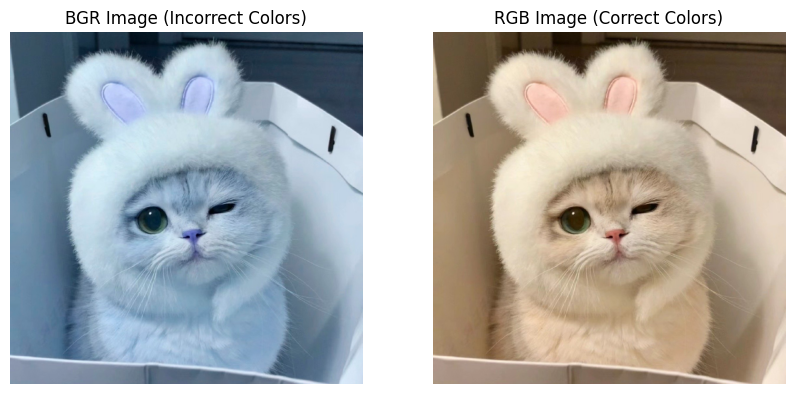

In [4]:
import matplotlib.pyplot as plt

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('BGR Image (Incorrect Colors)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('RGB Image (Correct Colors)')
plt.imshow(image_rgb)
plt.axis('Off')

plt.show()

## 4. Converting to different color space

We can use `cv2.imwrite(image, code)` for color space conversion.

The following are some code examples:

- **`cv2.BGR2RGB`**

- **`cv2.BGR2GRAY`**

- **`cv2.BGR2HSV`**

You can find more in [here](<https://docs.opencv.org/4.x/d8/d01/group__imgproc__color__conversions.html#ga4e0972be5de079fed4e3a10e24ef5ef0>).

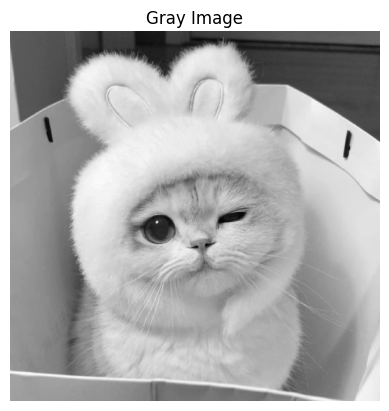

In [5]:
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(image_gray, 'gray')
plt.title('Gray Image')
plt.axis('off')

plt.show()

## 5. Saving Images

You can useBasic `cv2.imwrite(file_name, image, params)` to save the image.

In [6]:
cv2.imwrite('gray_image.jpg', image_gray)

True

## 6. Introduction to Convolution

Convolution is a fundamental operation in image processing, where a kernel (a small matrix) is applied over an image to produce a transformed output. This operation is widely used in various tasks, such as edge detection, blurring, sharpening, and more.

### 6.1 What is Convolution?

In the context of image processing, convolution involves sliding a kernel over the image, where at each position, the pixel values of the image are multiplied by the corresponding values of the kernel, and the results are summed up to produce a new pixel value. The result is a new image that is influenced by the properties of the kernel.

Mathematically, convolution is defined as:

$$
g(x, y) = \sum_{i=-k}^{k} \sum_{j=-k}^{j} h(i, j) \cdot f(x-i, y-j)
$$

Where:
- ${g(x, y)}$ is the output image after convolution.

- ${f(x, y)}$ is the input image.

- $h(i, j)$ is the convolution kernel.

- $k$ is the kernel size.

### 6.2 Applying Convolution in OpenCV

OpenCV provides a function `cv2.filter2D(src, ddepth, kernel, anchor, delta, borderType)` that allows us to apply convolution to an image with a specified kernel.

- `src`: source image

- `ddepth`: The desired depth of the destination image.

    - `-1`: Keeps the same depth as the source image.

    - `cv2.CV_8U`: Unsigned 8-bit integer (used for most standard images).

    - `cv2.CV_16S`: Signed 16-bit integer (useful for high precision).

    - `cv2.CV_32F`: 32-bit floating point (useful for high dynamic range).
    
    - `cv2.CV_64F`: 64-bit floating point (useful for very high precision).

- `kernel`: The convolution kernel (filter) that you want to apply to the image.

    - Example: 

$$
K =
\begin{pmatrix}
0 & -1 & 0 \\
-1 & 4 & -1 \\
0 & -1 & 0
\end{pmatrix}
$$

- `anchor`: The anchor point of the kernel, which indicates the pixel position in the kernel that is aligned with the pixel in the image being processed. 
The default value (-1, -1) means the anchor is at the kernel's center.

- `borderType`: Specifies how to handle the pixels at the image border. OpenCV provides several options for this:

    - `cv2.BORDER_CONSTANT`: Pads the image with a constant value (typically zero).

    - `cv2.BORDER_REPLICATE`: Repeats the border pixels.

    - `cv2.BORDER_REFLECT`: Reflects the border pixels (like a mirror).

    - `cv2.BORDER_WRAP`: Wraps around the border pixels from the opposite side.

    - `cv2.BORDER_DEFAULT`: Uses cv2.BORDER_REFLECT_101, which reflects the border pixels with some additional adjustments.



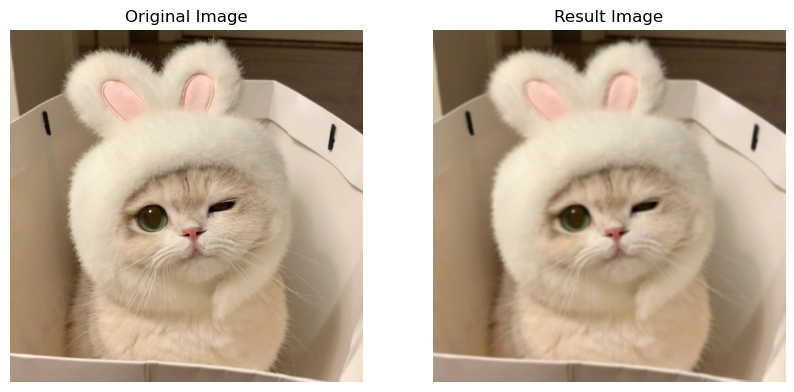

In [155]:
import numpy as np

kernel = np.ones((9, 9)) / 81
# kernel = np.array([[-1, -1, -1],
#                    [-1, 9, -1],
#                    [-1, -1, -1]])


res = cv2.filter2D(image_rgb, -1, kernel)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(res)
plt.title('Result Image')
plt.axis('off')

plt.show()

## 7. Introduction to Edge Detection

Edge detection is a crucial technique in image processing that identifies the boundaries or edges within an image. These edges represent areas of significant intensity change and often correspond to object boundaries, making edge detection a fundamental step in many computer vision tasks, such as object recognition, image segmentation, and feature extraction.

### 7.1 Common Edge Detection Methods

There are several methods for detecting edges in an image. Some of the most commonly used techniques include:

#### 7.1.1 Sobel Operator

The Sobel operator is a simple edge detection algorithm that uses two kernels to calculate the gradient of the image intensity in the x and y directions. The resulting gradient magnitude represents the strength of the edge at each pixel.

- **Horizontal (x) Sobel kernel**:
  $$
  K_x =
  \begin{pmatrix}
  -1 & 0 & 1 \\
  -2 & 0 & 2 \\
  -1 & 0 & 1
  \end{pmatrix}
  $$

- **Vertical (y) Sobel kernel**:
  $$
  K_y =
  \begin{pmatrix}
  -1 & -2 & -1 \\
   0 &  0 &  0 \\
   1 &  2 &  1
  \end{pmatrix}
  $$

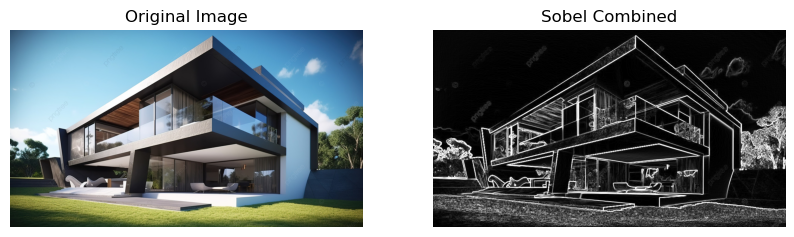

In [177]:
house = cv2.imread('images/house.jpg')
house_rgb = cv2.cvtColor(house, cv2.COLOR_BGR2RGB)
house_gray = cv2.cvtColor(house, cv2.COLOR_BGR2GRAY)

sobel_x = cv2.Sobel(house_gray, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(house_gray, cv2.CV_64F, 0, 1, ksize=3)

sobel_combined = cv2.magnitude(sobel_x, sobel_y)
sobel_combined = cv2.convertScaleAbs(sobel_combined)


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(house_rgb, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(sobel_combined, cmap='gray')
plt.title('Sobel Combined')
plt.axis('off')

plt.show()

#### 7.1.2 Canny Edge Detection

The Canny edge detector is a more sophisticated method that uses a multi-stage process to detect edges. 

It involves the following steps:

1. Noise reduction: Apply a Gaussian filter to smooth the image and reduce noise.

2. Gradient calculation: Compute the intensity gradient of the image.

3. Non-maximum suppression: Thin out the edges by suppressing non-maximum gradient values.

4. Double threshold: Identify strong, weak, and non-edges based on gradient magnitude.

5. Edge tracking by hysteresis: Finalize the edge detection by suppressing weak edges that are not connected to strong edges.

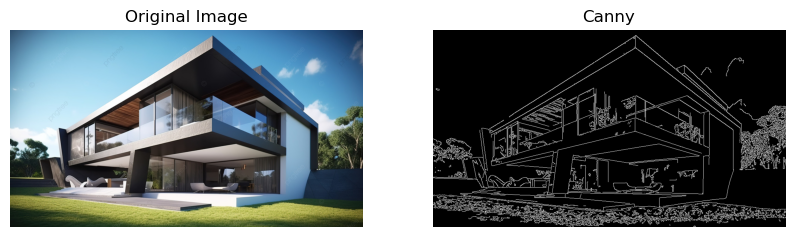

In [176]:
canny = cv2.Canny(house, 100, 200)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(house_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(canny, cmap='gray')
plt.title('Canny')
plt.axis('off')

plt.show()

## 8. Introduction to Hough Transform

The Hough Transform is a feature extraction technique used in image analysis, computer vision, and digital image processing. It is particularly useful for detecting geometrical shapes like lines and circles in images, even when they are partially obscured or noisy.

### 8.1 What is the Hough Transform?

The Hough Transform works by transforming points in the image space into curves in a parameter space. Each point in the image votes for a set of possible parameters, and the parameters that receive the most votes correspond to the detected shape.

#### 8.1.1 Hough Line Transform

The Hough Line Transform detects lines in an image. It is based on the principle that each point in the image can be represented as a line in the parameter space using the polar coordinates \((\rho, \theta)\).

- $\rho$ : The distance from the origin to the closest point on the line.
- $\theta$ : The angle between the x-axis and the line.

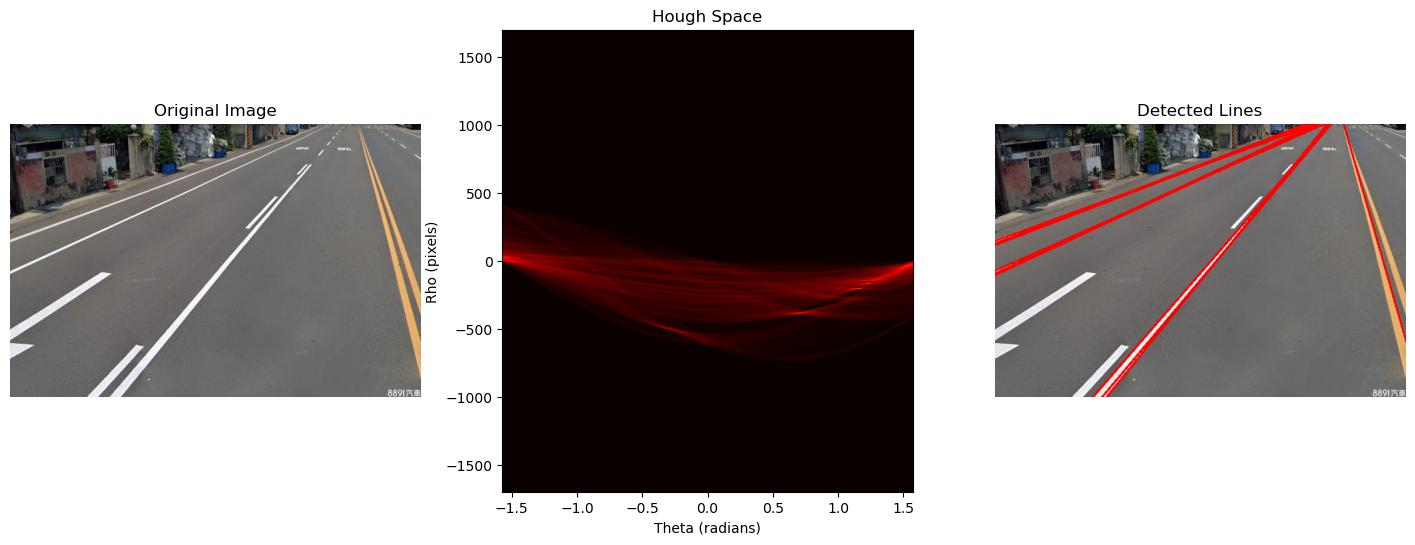

In [233]:
lane = cv2.imread('images/lane.jpg')

lane_gray = cv2.cvtColor(lane, cv2.COLOR_BGR2GRAY)
lane_rgb = cv2.cvtColor(lane, cv2.COLOR_BGR2RGB)

edges = cv2.Canny(lane_gray, 140, 200, apertureSize=3)

rho_max = int(np.sqrt(image.shape[0]**2 + image.shape[1]**2))
accumulator = np.zeros((2 * rho_max, 180), dtype=np.uint64)
thetas = np.deg2rad(np.arange(-90, 90))

for y in range(edges.shape[0]):
    for x in range(edges.shape[1]):
        if edges[y, x]:
            for theta_idx in range(len(thetas)):
                rho = int(x * np.cos(thetas[theta_idx]) + y * np.sin(thetas[theta_idx])) + rho_max
                accumulator[rho, theta_idx] += 1

lines = cv2.HoughLines(edges, 1, np.pi / 180, 170)

image_with_lines = lane_rgb.copy()

for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))
    cv2.line(image_with_lines, (x1, y1), (x2, y2), (255, 0, 0), 2)
    

    
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.imshow(lane_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(accumulator, cmap='hot', extent=[-np.pi / 2, np.pi / 2, -rho_max, rho_max], aspect='auto')
plt.title('Hough Space')
plt.xlabel('Theta (radians)')
plt.ylabel('Rho (pixels)')

plt.subplot(1, 3, 3)
plt.imshow(image_with_lines)
plt.title('Detected Lines')
plt.axis('off')

plt.show()

## 9. Feature Extraction and Matching

Feature extraction and matching are fundamental techniques in computer vision, used to identify and match key points in images. These techniques are critical in applications such as object recognition, image stitching, 3D reconstruction, and more.

### 9.1 What is Feature Extraction?

Feature extraction involves detecting distinctive points (features) in an image that can be used to represent the image. These features are usually areas of high contrast, such as corners, edges, or blobs, that are invariant to changes in scale, rotation, and lighting.

### 9.2 Common Feature Detectors

OpenCV provides several methods for feature detection, including:

- **SIFT (Scale-Invariant Feature Transform)**: Detects and describes local features in images, invariant to scale and rotation.

- **SURF (Speeded-Up Robust Features)**: A faster alternative to SIFT, also invariant to scale and rotation.

- **ORB (Oriented FAST and Rotated BRIEF)**: An efficient alternative to SIFT and SURF, widely used for its speed and robustness.

### 9.3 Feature Matching

Once features are extracted, feature matching involves finding corresponding features between two images. This is done by comparing the feature descriptors (a vector representing the features) and finding pairs with the smallest distance between them.

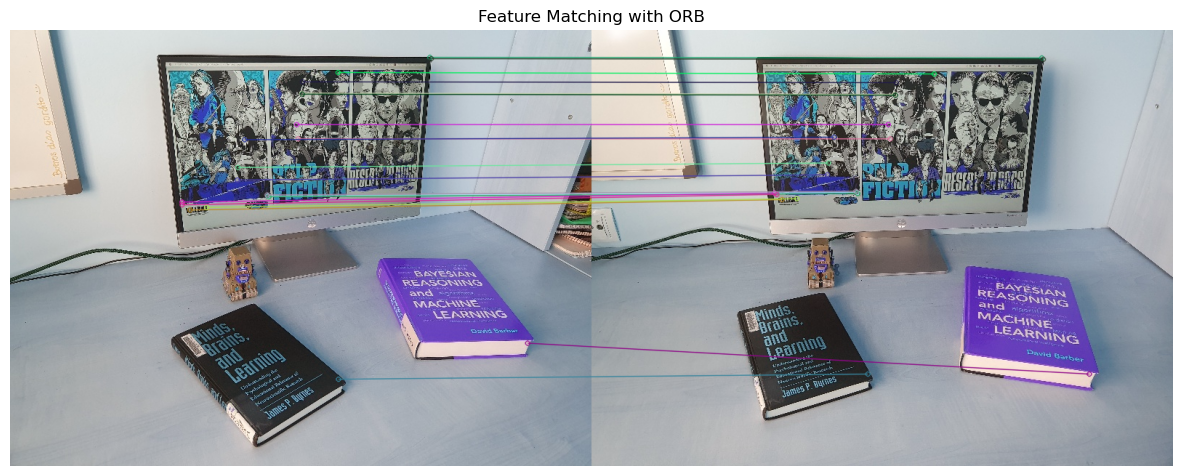

In [281]:
image1 = cv2.imread('images/matching1.jpg')
image2 = cv2.imread('images/matching2.jpg')

image1_rgb = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2_rgb = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

orb = cv2.ORB_create()

keypoints1, descriptors1 = orb.detectAndCompute(image1, None)
keypoints2, descriptors2 = orb.detectAndCompute(image2, None)

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(descriptors1, descriptors2)

matches = sorted(matches, key=lambda x: x.distance)

image_matches = cv2.drawMatches(image1, keypoints1, image2, keypoints2, matches[:20], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.figure(figsize=(15, 10))
plt.imshow(image_matches)
plt.title('Feature Matching with ORB')
plt.axis('off')
plt.show()

## HW2: Image Stitching
steps:
1. Read the images
2. Convert the image to Grayscale
3. Find feature points with SIFT
4. Matching features with knn match
5. Compute homography matrix 𝐻 (Hint: cv2.findHomography()
6. Perspective Transformation (Hint: cv2.warpPerspective()
7. Combine images


In [176]:
import cv2

### 1. Read the images

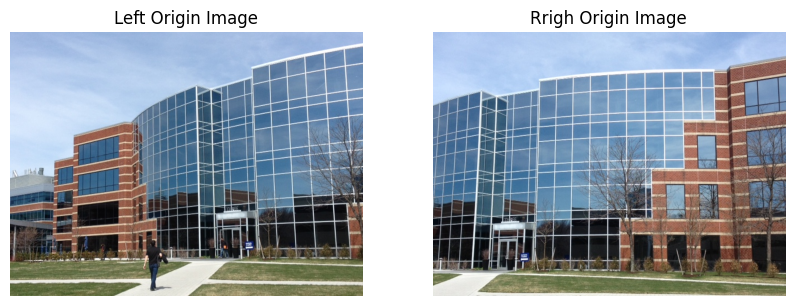

In [190]:
image_left = cv2.imread('images/left.jpg')
image_right = cv2.imread('images/right.jpg')
# image_right = cv2.imread('images/left.jpg')
# image_left = cv2.imread('images/right.jpg')

image_left_rgb = cv2.cvtColor(image_left, cv2.COLOR_BGR2RGB)
image_right_rgb = cv2.cvtColor(image_right, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_left_rgb, cmap='gray')
plt.title('Left Origin Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image_right_rgb, cmap='gray')
plt.title('Rrigh Origin Image')
plt.axis('off')

plt.show()


### 2. Convert the image to Grayscale

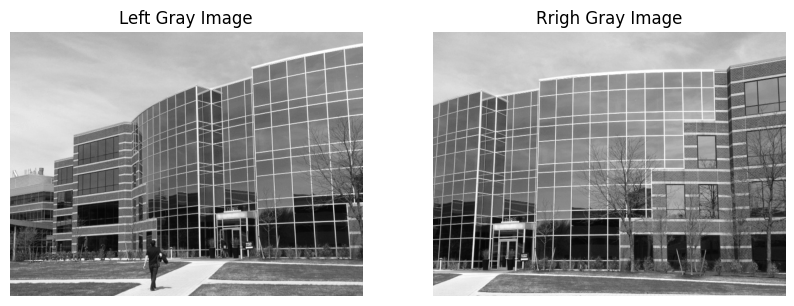

In [178]:
left_gray = cv2.cvtColor(image_left, cv2.COLOR_BGR2GRAY)
right_gray = cv2.cvtColor(image_right, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(left_gray, cmap='gray')
plt.title('Left Gray Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(right_gray, cmap='gray')
plt.title('Rrigh Gray Image')
plt.axis('off')

plt.show()

### 3. Find feature points with SIFT
OpenCV documents: https://docs.opencv.org/4.x/da/df5/tutorial_py_sift_intro.html

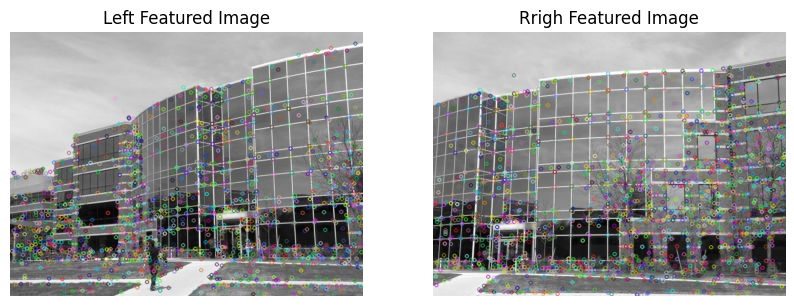

True

In [179]:
sift = cv2.SIFT_create()
# SIFT only can use gray
kp_left, des_left = sift.detectAndCompute(left_gray,None)
kp_right,des_right = sift.detectAndCompute(right_gray,None)
 
feature_left=cv2.drawKeypoints(left_gray,kp_left,image_left)
feature_right=cv2.drawKeypoints(right_gray,kp_right,image_right)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(feature_left, cmap='gray')
plt.title('Left Featured Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(feature_right, cmap='gray')
plt.title('Rrigh Featured Image')
plt.axis('off')

plt.show()

#save feature image
cv2.imwrite('left_feature.jpg', feature_left)
cv2.imwrite('right_feature.jpg', feature_right)

### 4. Matching features with knn match
OpenCV documents: https://docs.opencv.org/4.x/dc/dc3/tutorial_py_matcher.html

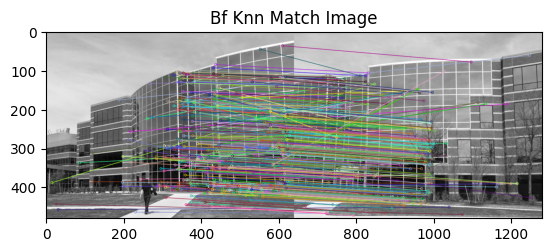

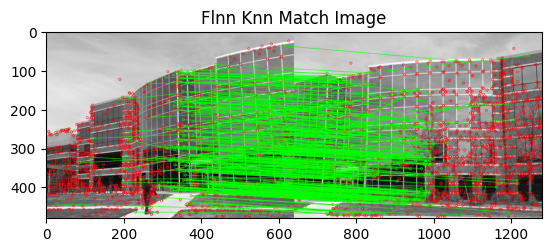

True

In [180]:
# BFMatcher with default params
bf = cv2.BFMatcher()
bfKnn_matches = bf.knnMatch(des_left,des_right,k=2)

# Apply ratio test
bfKnn_good = []
for m,n in bfKnn_matches:
    if m.distance < 0.75*n.distance:
        bfKnn_good.append([m])

# cv.drawMatchesKnn expects list of lists as matches.
bfKnn_match_image = cv2.drawMatchesKnn(left_gray,kp_left,right_gray,kp_right,bfKnn_good,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.imshow(bfKnn_match_image)
plt.title('Bf Knn Match Image')
plt.show()


plt.show()


##################################

# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # or pass empty dictionary
 
flann = cv2.FlannBasedMatcher(index_params,search_params)
 
flannKnn_matches = flann.knnMatch(des_left,des_right,k=2)
 
# Need to draw only good matches, so create a mask
flnnKnn_matchesMask = [[0,0] for i in range(len(flannKnn_matches))]
 
# ratio test as per Lowe's paper
for i,(m,n) in enumerate(flannKnn_matches):
    if m.distance < 0.7*n.distance:
        flnnKnn_matchesMask[i]=[1,0]
 
draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = flnnKnn_matchesMask,
                   flags = cv2.DrawMatchesFlags_DEFAULT)
 
flnnKnn_match_image = cv2.drawMatchesKnn(left_gray,kp_left,right_gray,kp_right,flannKnn_matches,None,**draw_params)
 
plt.imshow(flnnKnn_match_image)
plt.title('Flnn Knn Match Image')
plt.show()


#save feature matching image
cv2.imwrite('feature_matching.jpg', flnnKnn_match_image)

### 5. Compute homography matrix 𝐻 (Hint: cv2.findHomography()
Use Flnn Knn Feature Matching + homograghy

OpenCV documents: https://docs.opencv.org/4.x/d1/de0/tutorial_py_feature_homography.html

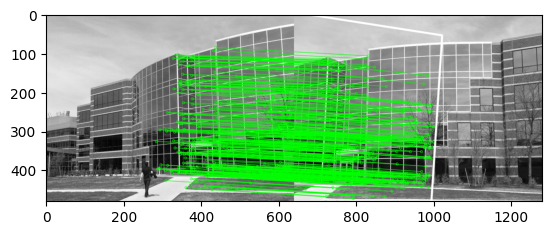

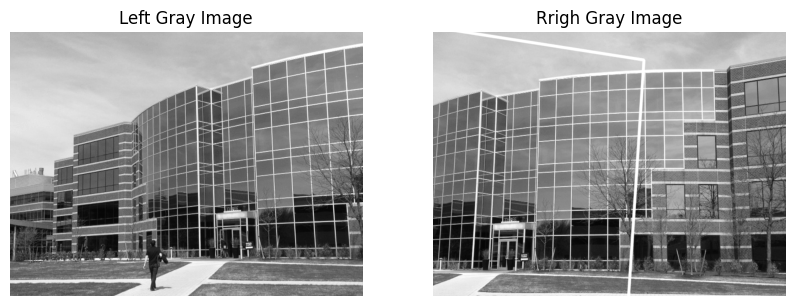

In [181]:
import numpy as np
# store all the good matches as per Lowe's ratio test.
flnnKnn_good = []
for m, n in flannKnn_matches:
    if m.distance < 0.7 * n.distance:
        flnnKnn_good.append(m)
        
MIN_MATCH_COUNT = 10
if len(flnnKnn_good)>MIN_MATCH_COUNT:
    src_pts = np.float32([ kp_left[m.queryIdx].pt for m in flnnKnn_good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp_right[m.trainIdx].pt for m in flnnKnn_good ]).reshape(-1,1,2)
 
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0) # M: 左圖相似點轉換到右圖相似點的矩陣
    matchesMask = mask.ravel().tolist()
 
    h,w = left_gray.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv2.perspectiveTransform(pts,M) #dst:左圖經相似轉換矩陣(M)後，4個角的位置(即左圖如果疊在右圖上，會位於右圖中的哪個區塊，區塊用矩形的4個點代表)
 
    polylines_right = cv2.polylines(right_gray,[np.int32(dst)],True,255,3, cv2.LINE_AA)
 
else:
    print( "Not enough matches are found - {}/{}".format(len(flnnKnn_good), MIN_MATCH_COUNT) )
    matchesMask = None

draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None,
                   matchesMask = matchesMask, # draw only inliers
                   flags = 2)
 
out_img = cv2.drawMatches(left_gray,kp_left,polylines_right,kp_right,flnnKnn_good,None,**draw_params)
 
plt.imshow(out_img, 'gray')
plt.show()

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(left_gray, cmap='gray')
plt.title('Left Gray Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(right_gray, cmap='gray')
plt.title('Rrigh Gray Image')
plt.axis('off')

plt.show()

### 6. Perspective Transformation (Hint: cv2.warpPerspective()
reference: https://steam.oxxostudio.tw/category/python/ai/opencv-warp-affine.html

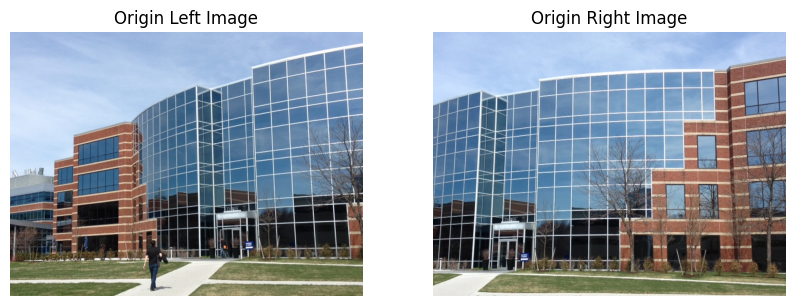

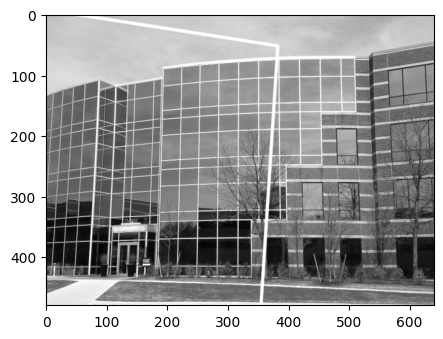

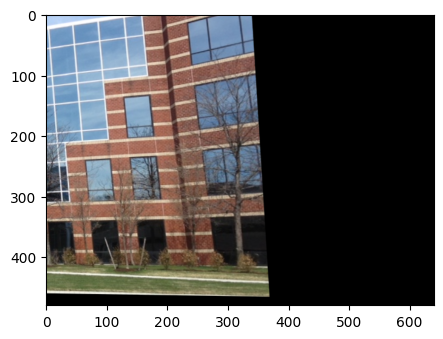

In [184]:
h_r,w_r = right_gray.shape
# print("sharp=(",h_r,w_r,")")
# print("dst=",dst)

# pts_r = np.float32([ [0,0],[0,h_r-1],[w_r-1,h_r-1],[w_r-1,0] ]).reshape(-1,1,2) #origin image_right 4 points
cut_r = np.float32([ [0-w_r+1,0],[0-w_r+1,h_r-1],[0,h_r-1],[0,0] ]).reshape(-1,1,2) # 要讓dst的四個點：右上和右下貼齊"右圖"y軸((0,0),(h-1,0))，左上和左下貼齊"左圖"的y軸((-(w-1), 0),(-(w-1), h-1))
m_get = cv2.getPerspectiveTransform(dst, cut_r) # 產生轉換矩陣m_get：該矩陣功能是可以讓"右圖"中不重疊的部分變形成"左圖"角度，且把重疊部分去除（原理："右圖"中兩張圖重複的部分轉換成"左圖"，即dst轉成我們要的位置cut_r，剩下不重複的部分就會一起變形成符合"左圖"的角度了）
result = cv2.warpPerspective(image_right_rgb, m_get, (w_r,h_r)) 

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_left_rgb, cmap='gray')
plt.title('Origin Left Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image_right_rgb, cmap='gray')
plt.title('Origin Right Image')
plt.axis('off')

plt.show()

plt.figure(figsize=(5, 5))
plt.imshow(polylines_right, 'gray')
plt.show()

plt.figure(figsize=(5, 5))
plt.imshow(result, 'gray')
plt.show()

### 7, Combine Image

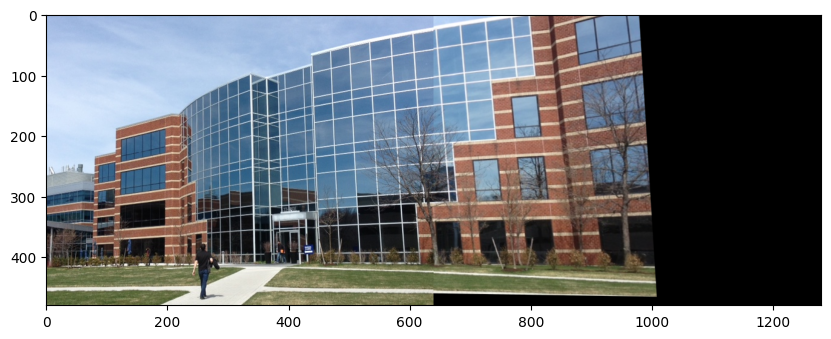

True

In [191]:
stitching_image= np.concatenate((image_left_rgb, result), axis=1) # x軸方向，將兩圖合併

plt.figure(figsize=(10, 5))
plt.imshow(stitching_image)
plt.show()

#save result image
cv2.imwrite('result.jpg',cv2.cvtColor(stitching_image, cv2.COLOR_RGB2BGR))